## Task C
### Exploration the data of Crime in the United States published on FBI's Web site www.fbi.gov  from the year 2013 to 2015.   

In [1]:
# import the package needed
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
matplotlib.style.use("ggplot")
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Step 1: Data pre-processing: To parse there data files and process them to a desired formate for futher analysis

In [2]:
# data for 2015
data = pd.ExcelFile('Table_5_Crime_in_the_United_States_by_State_2015.xls')
# print(data.sheet_names)
df = data.parse('15tbl05')
df = df.dropna(0, how = 'all')
df = df.dropna(1, how = 'all')
df.index = range(len(df.index))
df = df.drop(df.index[0:2])
df = df.drop(df.index[-9:])
df.index = range(len(df.index))

df15 = df[(df["Table 5"] == "State") |(df["Unnamed: 1"] == "State Total") | (df["Unnamed: 1"] == "Total")]

ab = df["Table 5"]
ab.dropna(0, how = 'all', inplace = True)
ab = ab[1:].tolist()

year = 2015
df15.columns = df15.iloc[0]
df15 = df15.drop(df.index[0])
df15 = df15.drop('State', 1)
df15.insert(0, "Year", year)
df15.insert(1, "State", ab)
df15.drop(df15.columns[2:4], axis=1, inplace=True)
df15.reset_index(drop=True, inplace=True)
df15['State'] = df15['State'].str.replace(r'[\d\,]', '')

# old_col = df13.columns
new_name = ['Year',
            'State',
            'Population',
            'Violent Crime',
            'Murder and nonnegligent manslaughter',
            'Rape (revised definition)',
            'Rape (legacy definition)',
            'Robbery',
            'Aggravated assault',
            'Property crime',
            'Burglary',
            'Larceny-theft',
            'Motor vehicle theft']

df15.columns =new_name
df15.head()

,Year,State,Population,Violent Crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft
0,2015,ALABAMA,4858979,22952,348,2039,1456,4611,15954,144746,35255,99156,10335
1,2015,ALASKA,738432,5392,59,901,650,761,3671,20806,3511,15249,2046
2,2015,ARIZONA,6828065,28012,309,3108,2294,6360,18235,207107,37957,152365,16785
3,2015,ARKANSAS,2978204,15526,181,1931,1300,2098,11316,96836,22640,68424,5772
4,2015,CALIFORNIA,39144818,166883,1861,12811,9387,52862,99349,1024914,197404,656517,170993


In [3]:
# data for 2014
data = pd.ExcelFile('Table_5_Crime_in_the_United_States_by_State_2014.xls')
df = data.parse('14tbl05')
df = df.dropna(0, how = 'all')
df = df.dropna(1, how = 'all')
df.index = range(len(df.index))
df = df.drop(df.index[0:2])
df = df.drop(df.index[-9:])
df.index = range(len(df.index))

df14 = df[(df["Table 5"] == "State") |(df["Unnamed: 1"] == "State Total") | (df["Unnamed: 1"] == "Total")]

year = 2014
df14.columns = df14.iloc[0]
df14 = df14.drop(df.index[0])
df14 = df14.drop('State', 1)
df14.insert(0, "Year", year)
df14.insert(1, "State", ab)
df14.drop(df14.columns[2:4], axis=1, inplace=True)
df14.reset_index(drop=True, inplace=True)
df14['State'] = df14['State'].str.replace(r'[\d\,]', '')
df14.columns =new_name
df14.head()

,Year,State,Population,Violent Crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft
0,2014,ALABAMA,4849377,20727,276,2005,1436,4701,13745,154094,39715,104238,10141
1,2014,ALASKA,736732,4684,41,771,555,629,3243,20334,3150,15445,1739
2,2014,ARIZONA,6731484,26916,319,3378,2464,6249,16970,215240,43562,154091,17587
3,2014,ARKANSAS,2966369,14243,165,1763,1182,2050,10265,99018,24790,68627,5601
4,2014,CALIFORNIA,38802500,153709,1699,11527,8398,48680,91803,947192,202670,592670,151852


In [4]:
# data for 2013
data = pd.ExcelFile('Table_5_Crime_in_the_United_States_by_State_2013.xls')
df = data.parse('13tbl05')
df = df.dropna(0, how = 'all')
df = df.dropna(1, how = 'all')
df.index = range(len(df.index))
df = df.drop(df.index[0:2])
df = df.drop(df.index[-9:])
df.index = range(len(df.index))

df13 = df[(df["Table 5"] == "State") |(df["Unnamed: 1"] == "State Total") | (df["Unnamed: 1"] == "Total")]

year = 2013
df13.columns = df13.iloc[0]
df13 = df13.drop(df.index[0])
df13 = df13.drop('State', 1)
df13.insert(0, "Year", year)
df13.insert(1, "State", ab)
df13.drop(df13.columns[2:4], axis=1, inplace=True)
df13.reset_index(drop=True, inplace=True)
df13['State'] = df13['State'].str.replace(r'[\d\,]', '')
df13.columns =new_name
df13.head()

,Year,State,Population,Violent Crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft
0,2013,ALABAMA,4833722,20826,347,2044,1428,4648,13787,161993,42429,108993,10571
1,2013,ALASKA,735132,4708,34,922,644,624,3128,21210,2916,16599,1695
2,2013,ARIZONA,6626624,27599,357,3050,2343,6702,17490,225243,48533,159272,17438
3,2013,ARKANSAS,2959373,13621,159,1423,993,2258,9781,106613,30485,70450,5678
4,2013,CALIFORNIA,38332521,154129,1746,9714,7464,53640,89029,1018907,232058,621557,165292


In [5]:
# Combine data for 2013 to 2015 to a dataframe
frames = [df13,df14,df15]
df_cb = pd.DataFrame
df_cb = pd.concat(frames)
df_cb["Crime Rate"] = (df_cb.loc[:,"Violent Crime":"Motor vehicle theft"].sum(axis=1) / df_cb["Population"]) * 100
df_cb["Population (in 100,000)"] = df_cb["Population"] / 100000
df_cb
df_cb.head()

,Year,State,Population,Violent Crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Crime Rate,"Population (in 100,000)"
0,2013,ALABAMA,4833722,20826,347,2044,1428,4648,13787,161993,42429,108993,10571,7.59386,48.3372
1,2013,ALASKA,735132,4708,34,922,644,624,3128,21210,2916,16599,1695,7.13885,7.35132
2,2013,ARIZONA,6626624,27599,357,3050,2343,6702,17490,225243,48533,159272,17438,7.66645,66.2662
3,2013,ARKANSAS,2959373,13621,159,1423,993,2258,9781,106613,30485,70450,5678,8.15919,29.5937
4,2013,CALIFORNIA,38332521,154129,1746,9714,7464,53640,89029,1018907,232058,621557,165292,6.13979,383.325


### Step 2: Investigating the state population in the US by visualisation 

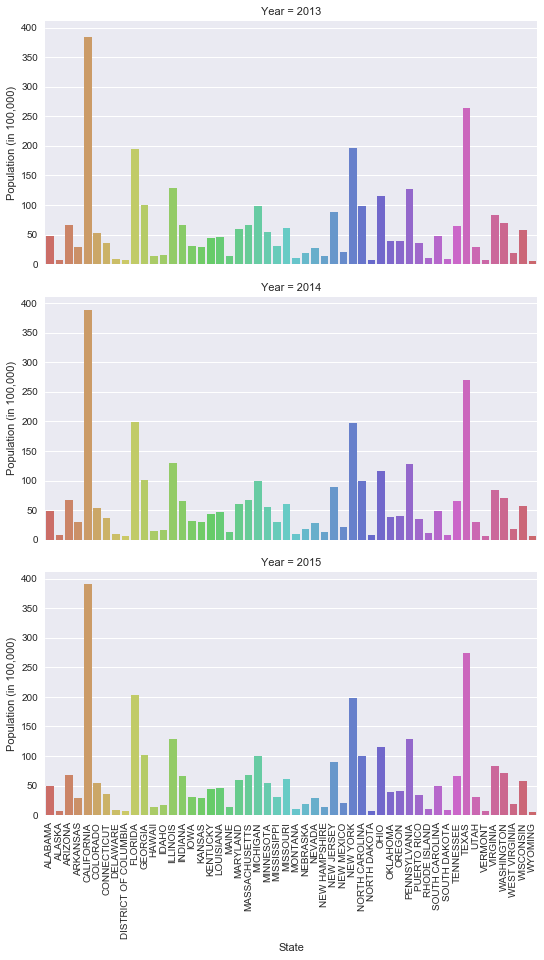

In [6]:
data = df_cb
g = sns.FacetGrid(data, row="Year", size=4, aspect=2)
g.map(sns.barplot, "State", "Population (in 100,000)" ,palette="hls").set_xticklabels(rotation=90)

### Step 3: Investigating the state crime rate in the US by visualisation 

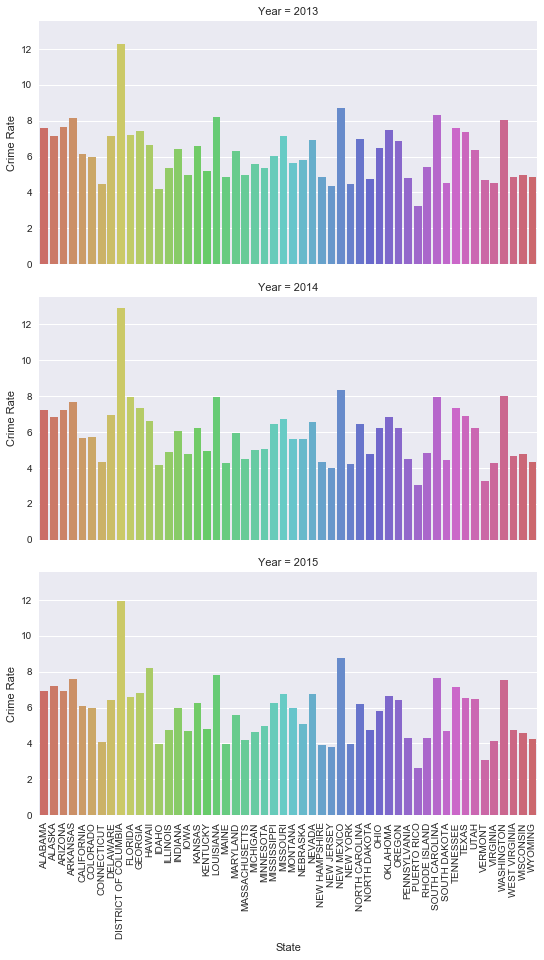

In [16]:
data = df_cb
g = sns.FacetGrid(data, row="Year", size=4, aspect=2)
g.map(sns.barplot, "State", "Crime Rate",palette="hls").set_xticklabels(rotation=90)

### Step 4: Visualising the Relationship between population and crime rate in the US

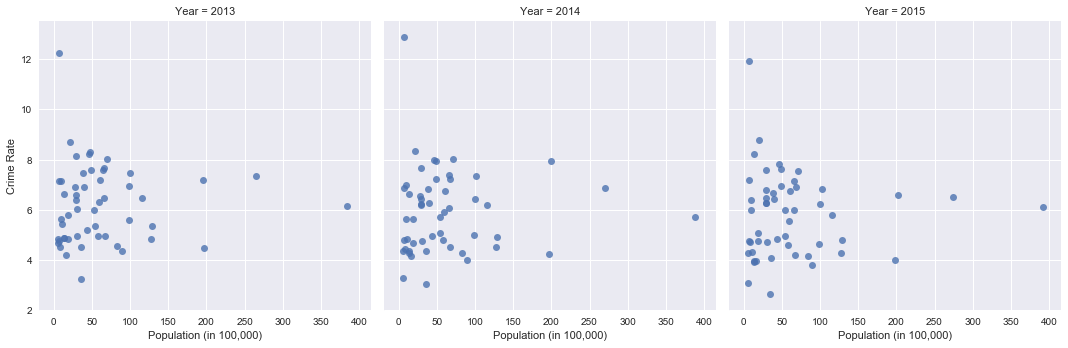

In [7]:
data = df_cb
g = sns.lmplot(x= 'Population (in 100,000)', y="Crime Rate", col="Year" , data=data , fit_reg=False)